In [1]:
import pandas as pd
dataset=pd.read_csv('weather.csv')
dataset

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


Converting data into number

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
outlook=LabelEncoder()
temperature=LabelEncoder()
humidity=LabelEncoder()
windy=LabelEncoder()
play=LabelEncoder()

replace with encoded value

In [4]:
dataset['outlook']=outlook.fit_transform(dataset['outlook'])
dataset['temperature']=outlook.fit_transform(dataset['temperature'])
dataset['humidity']=outlook.fit_transform(dataset['humidity'])
dataset['windy']=outlook.fit_transform(dataset['windy'])
dataset['play']=outlook.fit_transform(dataset['play'])

In [5]:
dataset

,outlook,temperature,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


Seperate Independent and Dependent variable

In [6]:
features_col=['outlook','temperature','humidity','windy']
x=dataset[features_col]
y=dataset.play

In [7]:
x

,outlook,temperature,humidity,windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
5,1,0,1,0
6,1,0,1,1
7,1,2,1,0
8,1,2,0,1
9,2,1,0,0


In [8]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play, dtype: int32

Seperate dataset for train and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
classifier=DecisionTreeClassifier(criterion='gini')

In [13]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
classifier.predict(x_test)

array([1, 1, 0])

In [15]:
classifier.score(x_test,y_test)

0.6666666666666666

[Text(0.5, 0.9, 'x[2] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.3, 0.7, 'x[0] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.2, 0.5, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.7, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.5, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

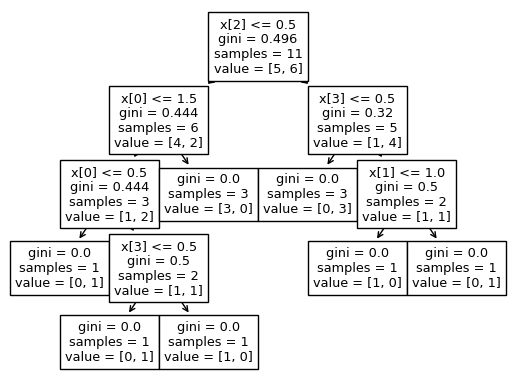

In [16]:
from sklearn import tree
tree.plot_tree(classifier)